In [1]:
setwd("~/Documents/DE/2019/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(MASS)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: nlme
Loading required package: tidyr
Loading required package: MASS


In [2]:
data=read.csv("IR_test.csv")

In [4]:
head(data)

Replicate,Time,Cells
6,24,0
5,24,1
4,24,0
3,24,0
2,24,24
1,24,26


In [20]:
data$Time=factor(as.character(data$Time), level=c("0","6","24"))
data$Replicate=factor(as.character(data$Replicate)) 

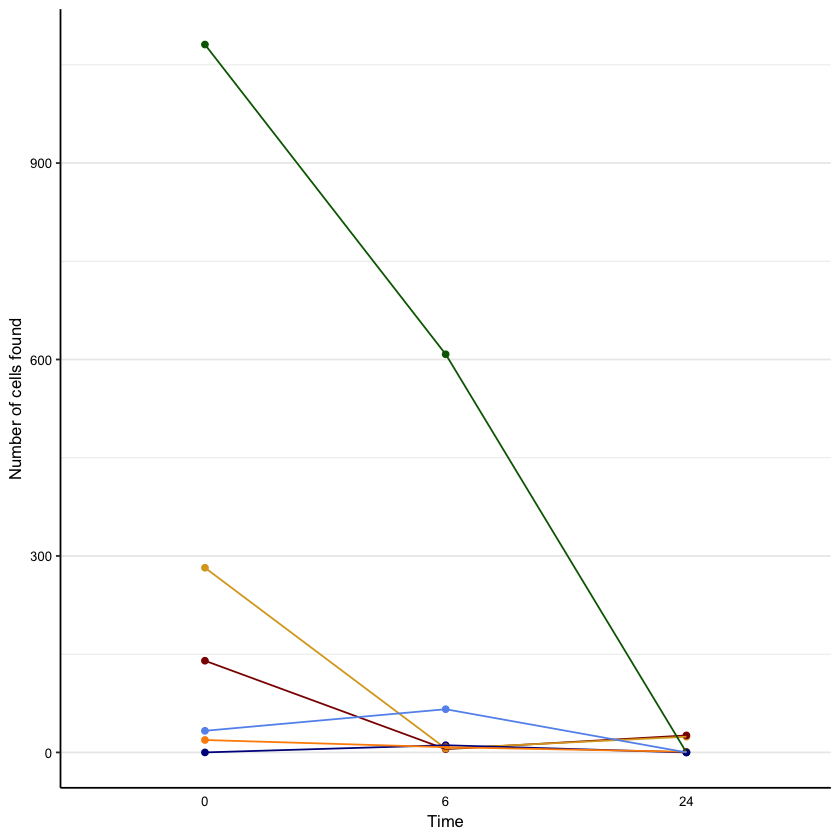

In [24]:
ggplot(data, aes(x = Time, y = Cells, color=Replicate, group=Replicate)) +
scale_color_manual(values=c("darkred", "goldenrod", "darkblue", "darkgreen", "darkorange", "cornflowerblue"))+
geom_point()+
       #geom_jitter(position=position_jitter(0.3))+
geom_line()+

theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Number of cells found")